In [1]:
from pandas import DataFrame, read_csv
from pandas.tools.plotting import parallel_coordinates
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read in crime data and show the first 5 rows of data
raw_data = pd.read_csv('MCI_2014-2018.csv',sep=",")
raw_data.head()

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Lat,Long,ObjectId
0,-79.343094,43.668449,214,GO-20141948968,2014-04-24T11:29:00.000Z,2014-04-24T12:46:00.000Z,Commercial,1610,200,Robbery - Mugging,...,114.0,Thursday,11,Robbery,D55,68,North Riverdale (68),43.668449,-79.343094,1
1,-79.507927,43.759285,215,GO-20141950728,2014-04-24T13:00:00.000Z,2014-04-24T15:58:00.000Z,House,2120,200,B&E,...,114.0,Thursday,13,Break and Enter,D31,24,Black Creek (24),43.759285,-79.507927,2
2,-79.501663,43.697552,216,GO-20141956416,2014-04-25T13:20:00.000Z,2014-04-25T13:52:00.000Z,Apartment,1430,100,Assault,...,115.0,Friday,13,Assault,D12,30,Brookhaven-Amesbury (30),43.697552,-79.501663,3
3,-79.571510,43.721703,217,GO-20141956867,2014-04-24T17:00:00.000Z,2014-04-25T10:30:00.000Z,Outside,1430,100,Assault,...,114.0,Thursday,17,Assault,D23,4,Rexdale-Kipling (4),43.721703,-79.571510,4
4,-79.503487,43.663891,218,GO-20141957505,2014-04-25T16:00:00.000Z,2014-04-25T16:15:00.000Z,Apartment,1430,100,Assault,...,115.0,Friday,16,Assault,D11,114,Lambton Baby Point (114),43.663891,-79.503487,5


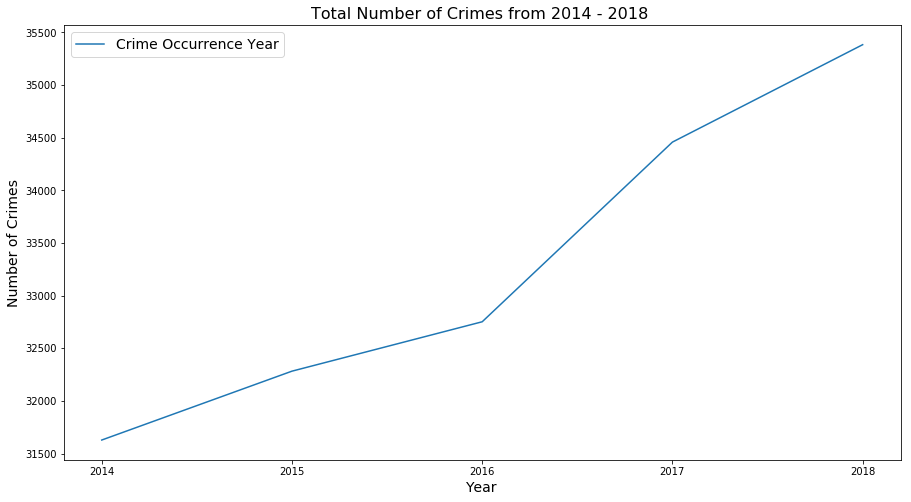

In [3]:
# line graph shows the total amount of crimes from year 2014 to 2018
# find total crime value of each year from 2014-2018
crime_by_year = raw_data[raw_data['occurrenceyear']>=2014]['occurrenceyear']
crime_by_year = crime_by_year.value_counts()
# create graph
crime_by_year.plot(xticks=[2014,2015,2016,2017,2018],legend=True,figsize=(15,8))
# plot legend
plt.legend(['Crime Occurrence Year'],prop={'size': 14})
# plot title
plt.title('Total Number of Crimes from 2014 - 2018 ',size = 16)
# plot x label
plt.xlabel("Year",size=14)
# plot y label
plt.ylabel("Number of Crimes",size=14)
# save graph to png
plt.savefig('1.png')

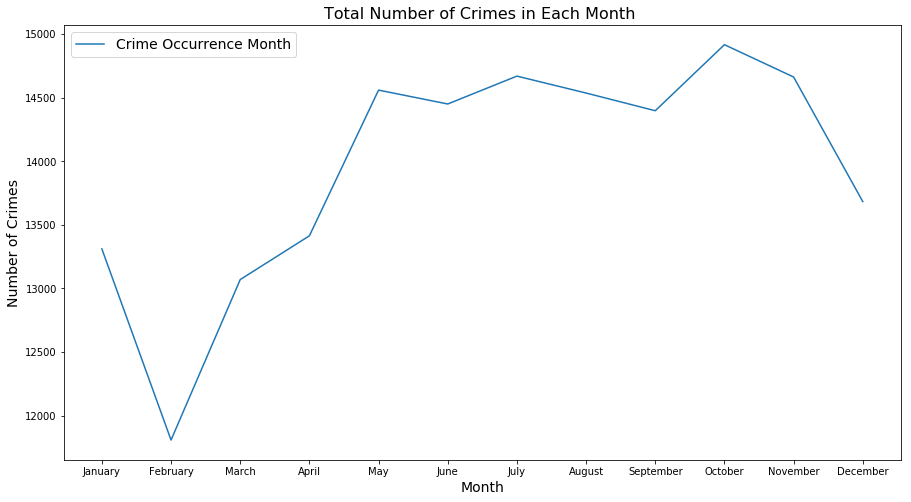

In [4]:
# line graph shows the total amount of crimes per month
# find total crime value of each month and sort by month
month= raw_data['occurrencemonth'].value_counts()
month.index = pd.CategoricalIndex(month.index, 
                               categories=["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"])
month=month.sort_index()
# create line graph
month.plot(xticks=[0,1,2,3,4,5,6,7,8,9,10,11],figsize=(15,8))
plt.legend(['Crime Occurrence Month'],prop={'size': 14})
# plot title
plt.title('Total Number of Crimes in Each Month ',size = 16)
# plot x label
plt.xlabel("Month",size=14)
# plot y label
plt.ylabel("Number of Crimes",size=14)
# save graph to png
plt.savefig('2.png')

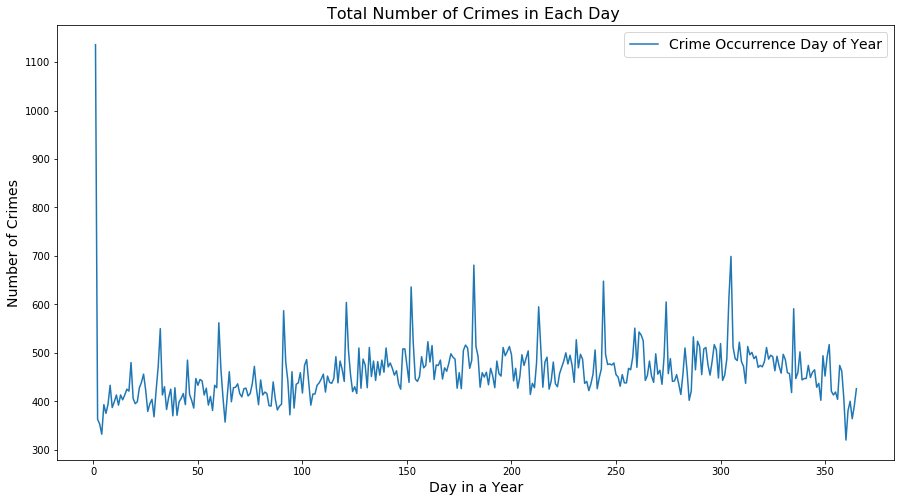

In [5]:
# line graph shows the total amount of crimes per day
dayofyear = raw_data['occurrencedayofyear'].value_counts().sort_index()
# select 365 days instead of 366
dayofyear = dayofyear [:365]
# set up plot figure size
dayofyear.plot(figsize=(15,8))
# plot legend
plt.legend(['Crime Occurrence Day of Year'],prop={'size': 14})
# plot title
plt.title('Total Number of Crimes in Each Day ',size = 16)
# plot x label
plt.xlabel("Day in a Year",size=14)
# plot y label
plt.ylabel("Number of Crimes",size=14)
# save graph to png
plt.savefig('3.png')

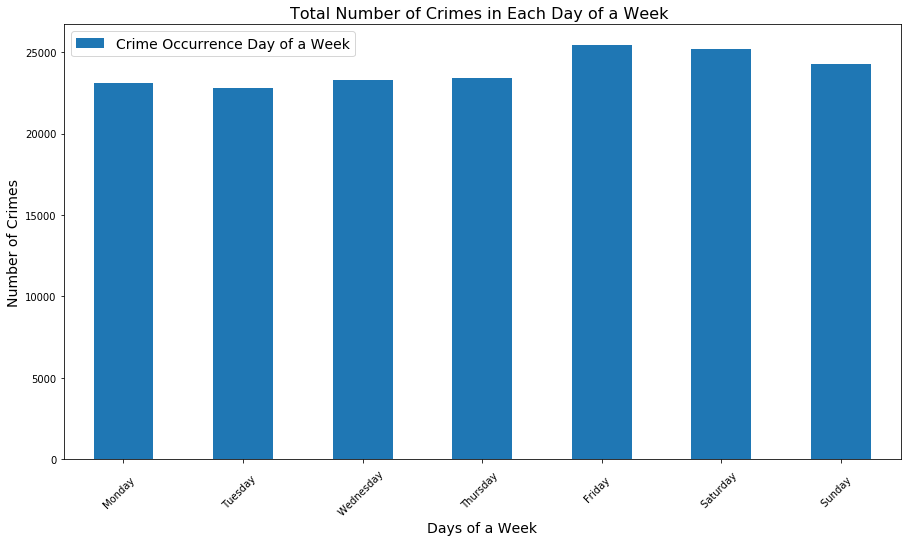

In [6]:
# bar graph shows the total amount of crimes per day in a week
# find total crime value per day in a week and sort by days in a week
dayofweek= raw_data['occurrencedayofweek'].value_counts()
dayofweek.index = pd.CategoricalIndex(dayofweek.index, 
                               categories=['Monday    ', 'Tuesday   ', 'Wednesday ', 'Thursday  ', 'Friday    ', 'Saturday  ', 
          'Sunday    '])
dayofweek=dayofweek.sort_index()
# creat bar graph
dayofweek.plot(kind='bar',color='#1f77b4',figsize=(15,8))
# rotate plot x axis
plt.xticks(rotation=45)
# plot legend
plt.legend(['Crime Occurrence Day of a Week'],prop={'size': 14})
# plot title
plt.title('Total Number of Crimes in Each Day of a Week ',size = 16)
# plot x label
plt.xlabel("Days of a Week",size=14)
# plot y label
plt.ylabel("Number of Crimes",size=14)
# save graph to png
plt.savefig('4.png')

In [7]:
from dateutil import parser
# create subset of occurrencedate from raw data
occ_date = raw_data['occurrencedate']
# create subset of reporteddate from raw data
report_date = raw_data['reporteddate']
# classify crime occurence time into different part of days
time_part = []
for i in range (len(raw_data)):
    temp_time = parser.parse(occ_date[i]).time().hour
    if temp_time>=4 and temp_time <12:
        time_part.append("Morning")
    elif temp_time>=12 and temp_time <17:
        time_part.append("Afternoon")
    elif temp_time>=17 and temp_time <21:
        time_part.append("Evening")
    elif temp_time >=21 or temp_time <4:
        time_part.append("Night")
# add partofday column to the original dataset
raw_data['partofday'] = time_part

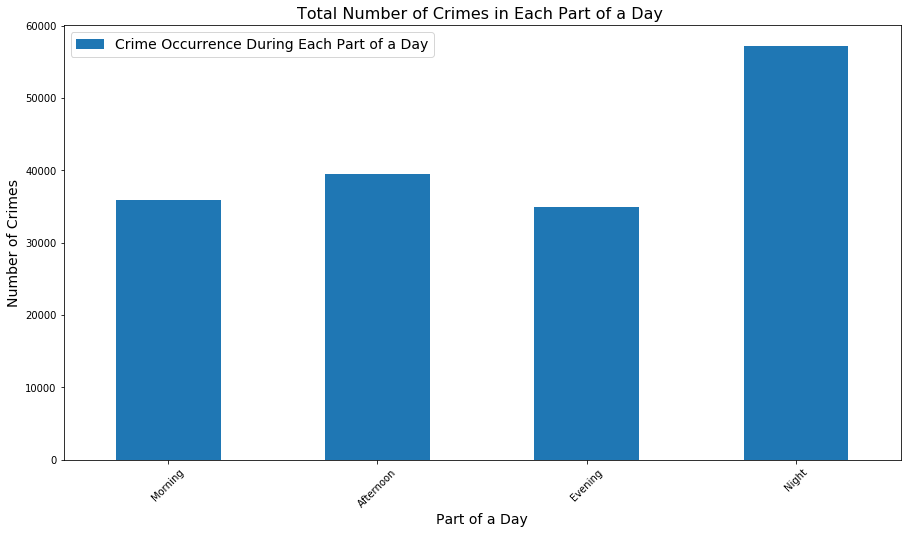

In [8]:
# bar graph shows the total amount of crimes in each part of a day
partofday = raw_data['partofday'].value_counts()
# create custome orders by morning, afternoon, evening and night
partofday.index = pd.CategoricalIndex(partofday.index, 
                               categories=["Morning", "Afternoon", "Evening", "Night"])
# sort the data by part of day
partofday=partofday.sort_index()
# create the bar graph
partofday.plot(kind='bar',color='#1f77b4',figsize=(15,8))
# roate x axis by 45 degrees
plt.xticks(rotation=45)
# plot legend
plt.legend(['Crime Occurrence During Each Part of a Day'],prop={'size': 14})
# plot title
plt.title('Total Number of Crimes in Each Part of a Day ',size = 16)
# plot x label
plt.xlabel("Part of a Day",size=14)
# plot y label
plt.ylabel("Number of Crimes",size=14)
# save graph to png
plt.savefig('5.png')

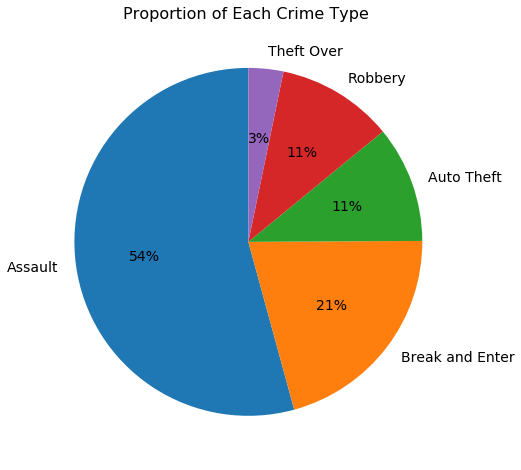

In [9]:
# create subset of MCI data from raw data
MCI=raw_data['MCI'].value_counts()
# set up figure size
plt.figure(figsize=(15,8))
# create a pie graph of each crime types
plt.pie(
    # chart data
    MCI,
    # chart labels 
    labels=MCI.index,
    #display percentage
    autopct='%1.0f%%',
    # disable shadow of pie chart
    shadow=False,
    # font size 
    textprops={'size': 14},
    # the first value starts from 90 degrees of the pie chart 
    startangle=90,
    )
# plot title
plt.title('Proportion of Each Crime Type ',size = 16)
# save graph to png
plt.savefig('6.png')

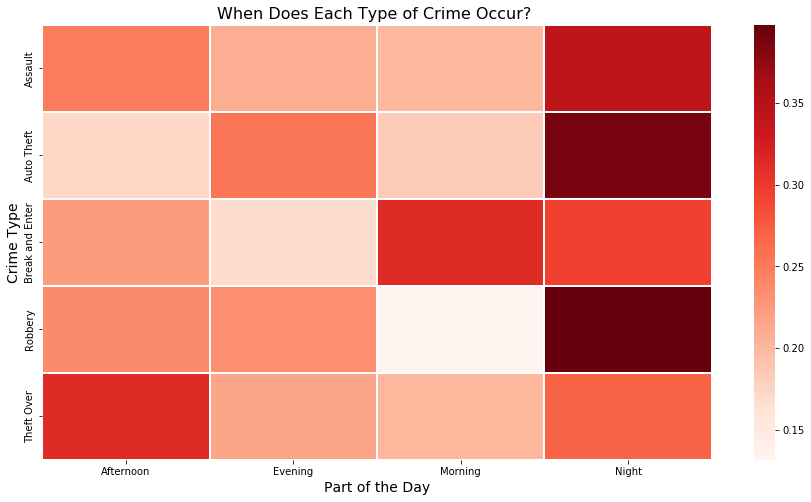

In [10]:
# combine occurrencedayofweek and part of day to see relations
time_crime =pd.crosstab(raw_data['MCI'], raw_data['partofday'],normalize='index')
# set up figure size
plt.figure(figsize=(15,8))
# heatmap to see relationship between crime occurrence day and part of day
sns.heatmap(time_crime, cmap="Reds",linewidths=1)
# plot title
plt.title('When Does Each Type of Crime Occur? ',size = 16)
plt.yticks(va="center")
# plot x label
plt.xlabel("Part of the Day",size=14)
# plot y label
plt.ylabel("Crime Type",size=14)
# save graph to png
plt.savefig('7.png')

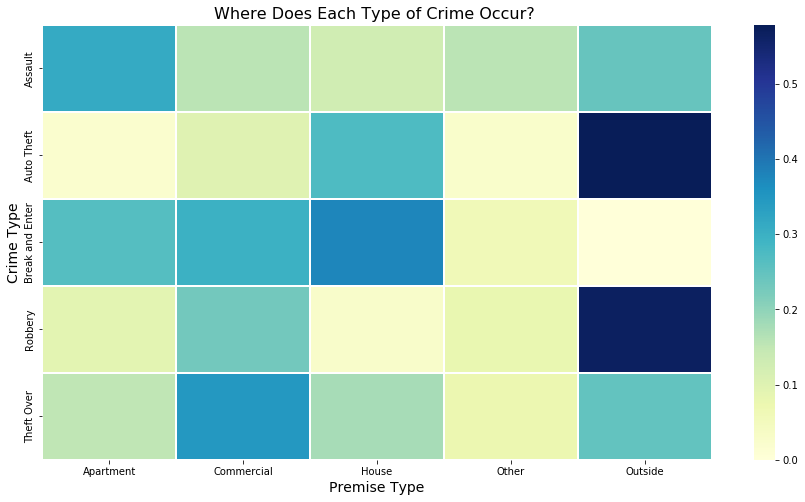

In [11]:
# combine occurrencedayofweek and part of day to see relations
premise_crime = pd.crosstab(raw_data['MCI'], raw_data['premisetype'],normalize='index')
# set up figure size
plt.figure(figsize=(15,8))
# heatmap to see relationship between crime occurrence day and part of day
sns.heatmap(premise_crime, cmap="YlGnBu",linewidths=1)
# plot title
plt.title('Where Does Each Type of Crime Occur? ',size = 16)
plt.yticks(va="center")
# plot x label
plt.xlabel("Premise Type",size=14)
# plot y label
plt.ylabel("Crime Type",size=14)
# save graph to png
plt.savefig('8.png')


In [12]:
# calculate the time difference between crime occurence and reported 
time_gap=[]
time_diff=0
for i in range (len(raw_data)):
    # read in occurence time and reported time
    dt1 = parser.parse(occ_date[i])
    dt2 = parser.parse(report_date[i])
    # convert seconds to hours
    time_diff = np.abs(np.round((dt1-dt2).total_seconds()/3600,2))
    if time_diff <=3:
        time_gap.append('Fast')
    elif time_diff <=24 and time_diff >3 :
        time_gap.append('Moderate')
    else:
        time_gap.append('Slow')
# add time gap into original data
raw_data['timegap'] = time_gap

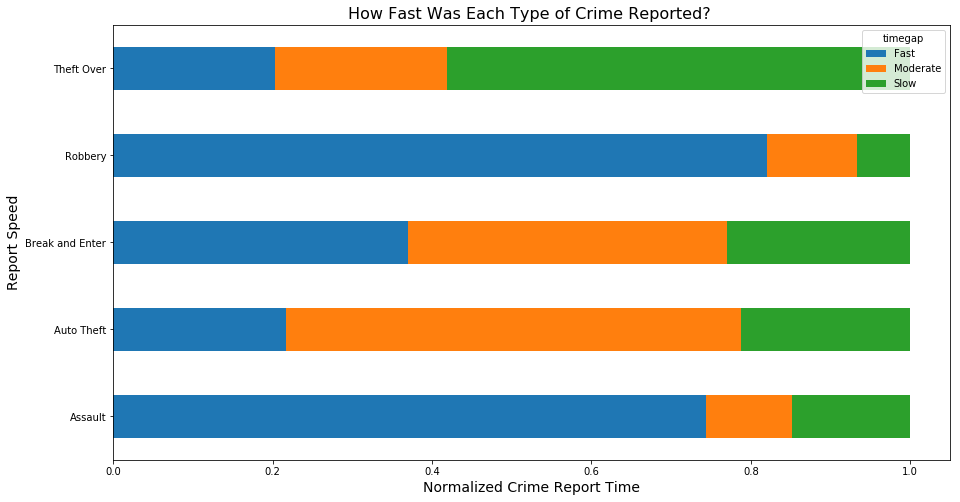

In [13]:
# create cross tab for time gap and crimes
reporttime_crime = pd.crosstab(raw_data['MCI'], raw_data['timegap'],normalize='index')
# create horizontal stacked bar graph
reporttime_crime.plot.barh(stacked=True,figsize=(15,8))
# plot title
plt.title('How Fast Was Each Type of Crime Reported? ',size = 16)
# plot x label
plt.xlabel("Normalized Crime Report Time",size=14)
# plot y label
plt.ylabel("Report Speed",size=14)
# save graph to png
plt.savefig('9.png')

In [14]:
# geography maps using folium library
# reference from https://python-visualization.github.io/folium/quickstart.html
import folium
# set up center cordinates of the map
toronto_cordinates = (43.6532, -79.3832)
# toronto neighbourhood geojson downloaded from https://github.com/adamw523/toronto-geojson
district_geo = r'toronto_neighbour.geojson'  
# calculating total number of crimes per neighbour
crime_data = pd.DataFrame(raw_data['Hood_ID'].value_counts().astype(float))
crime_data = crime_data.reset_index()
crime_data.columns = ['Hood_ID', 'Number']
# creation of the choropleth map
map1 = folium.Map(location=toronto_cordinates, zoom_start=10)
folium.Choropleth(
    # neighbourhood data
    geo_data=district_geo,
    # data to display map
    data=crime_data,
    # select HOOD_ID and rate columns
    columns=['Hood_ID', 'Number'],
    # select HOODNUM feature in geojson file 
    key_on = 'feature.properties.HOODNUM',
    # color scheme
    fill_color='YlOrRd',
    # map color fill opacity
    fill_opacity=0.7,
    # border line opacity
    line_opacity=0.5,
    # add map legend
    legend_name='Number of Crimes in Each Neighbour').add_to(map1)

# create a layer to display neighborhood names
# reference from https://github.com/python-visualization/folium/issues/929
folium.GeoJson(
    # use json data
    district_geo,
    # function to create custom labels and colors
    style_function=lambda feature: {
        # make this layer transparent so it doesn't block choropleth map
        'weight': 0,
        'fillOpacity':0
    },
    # use GeoJsonTooltip library to display neighbourhood names
    tooltip=folium.features.GeoJsonTooltip( fields=['HOOD'], aliases=['Neighbourhood'] )
).add_to(map1)

# display map
display(map1)
# save map 
map1.save('1.html')


In [15]:
# get information from toronto population
# neighbourhood population downloaded from https://www.toronto.ca/city-government/data-research-maps/neighbourhoods-communities/neighbourhood-profiles/
demo_data = pd.read_csv('Toronto-Demographics.csv',sep=",")
# transpose the the columns to rows
demo_data=demo_data.T
demo_data = demo_data.reset_index()
demo_data.columns = ['HOOD_ID', 'Number']
# convert hood id to integer
demo_data['HOOD_ID'] = demo_data['HOOD_ID'].astype(int)

# select crime data with neighbourhood id
id_data = pd.DataFrame(raw_data['Hood_ID'].value_counts())
id_data = id_data.reset_index()
id_data.columns = ['HOOD_ID', 'Number']
# convert hood id to integer
id_data['HOOD_ID'] = id_data['HOOD_ID'].astype(int)


In [16]:
# merge id_data and demo_data to calculate crime rate
merged = pd.merge(id_data, demo_data, on=['HOOD_ID'])
merged ['rate'] = merged['Number_x'] / merged['Number_y'] *10000
merged.head()

,HOOD_ID,Number_x,Number_y,rate
0,75,6301,31340,2010.529675
1,77,5674,65913,860.831702
2,1,4338,33312,1302.233429
3,73,3609,20506,1759.972691
4,76,3564,25797,1381.555995


In [17]:
# reference from https://python-visualization.github.io/folium/quickstart.html
# creation of the choropleth
map1 = folium.Map(location=toronto_cordinates, zoom_start=10)
folium.Choropleth(
    # neighbourhood data
    geo_data=district_geo,
    # crime data
    data=merged,
    # select HOOD_ID and rate columns
    columns=['HOOD_ID', 'rate'],
    # select HOODNUM feature in geojson file 
    key_on = 'feature.properties.HOODNUM',
    # color scheme
    fill_color='YlOrRd',
    # map color fill opacity
    fill_opacity=0.7,
    # border line opacity
    line_opacity=0.5,
    # add map legend
    legend_name='Number of Crimes in each Neighbour per 10,000 population').add_to(map1)

# create a layer to display neighborhood names
# reference from https://github.com/python-visualization/folium/issues/929
folium.GeoJson(
    # use json data
    district_geo,
    # function to create custom labels and colors
    style_function=lambda feature: {
        # make this layer transparent so it doesn't block choropleth map
        'weight': 0,
        'fillOpacity':0
    },
    # use GeoJsonTooltip library to display neighbourhood names
    tooltip=folium.features.GeoJsonTooltip( fields=['HOOD'], aliases=['Neighbourhood'] )
).add_to(map1)
               
# display map
display(map1)
# save map 
map1.save('2.html')


In [18]:
# find out the top 10 dangerous and safe neighbourhood by sorting the crime rate
top10_dangerous = merged.sort_values(by='rate',ascending=False)[:10]
top10_safe = merged.sort_values(by='rate',ascending=True)[:10]
# create neighbourhood id list for the top 10 dangerous and safe neighbourhood
safe_list = list(top10_safe['HOOD_ID'])
dangerous_list = list(top10_dangerous['HOOD_ID'])

In [19]:
# reference from https://python-visualization.github.io/folium/quickstart.html
map1 = folium.Map(location=toronto_cordinates, zoom_start=10)
folium.GeoJson(
    district_geo,
    # function to create custom labels and colors
    style_function=lambda feature: {
        # fill top 10 safe neighbourhoods with green color and top 10 dangerous neighbourhoods with red color
        'fillColor': 'green' if feature['properties']['HOODNUM'] in safe_list 
        else'red' if feature['properties']['HOODNUM'] in dangerous_list else 'white' ,
        # border color
        'color': 'black',
        # border line weight
        'weight': 1,
        # color fill opacity
        'fillOpacity': 0.7,
    },
    # use GeoJsonTooltip library to display neighbourhood names
    tooltip=folium.features.GeoJsonTooltip( fields=['HOOD'], aliases=['Neighbourhood'] )
).add_to(map1)
               
# display map
display(map1)
# save map 
map1.save('3.html')


In [20]:
# get top 10 safe and dangerous neighbourhoods' name
safe_neighbours = list(set(raw_data[raw_data["Hood_ID"].isin(safe_list)].Neighbourhood))
dangerous_neighbours = list(set(raw_data[raw_data["Hood_ID"].isin(dangerous_list)].Neighbourhood))

In [21]:
# set up custom orders for top 10 safe and dangerous neighbourhoods
safe_order = ["Yonge-St.Clair (97)", "Centennial Scarborough (133)", "Lambton Baby Point (114)",
           "Mount Pleasant East (99)", "Humewood-Cedarvale (106)" ,"Broadview North (57)", 
           "Pleasant View (46)","Danforth East York (59)", "High Park-Swansea (87)",
           "Yonge-Eglinton (100)"]
dangerous_order = ["Church-Yonge Corridor (75)", "Kensington-Chinatown (78)", "Moss Park (73)",
           "University (79)", "Bay Street Corridor (76)" ,"West Humber-Clairville (1)", 
           "Humber Summit (21)","Danforth (66)", "York University Heights (27)",
           "Yorkdale-Glen Park (31)"]

In [22]:
# sort top 10 safe and dangerous neighbourhoods
safe_neighbours.sort(key=safe_order.index)
dangerous_neighbours.sort(key=dangerous_order.index)
print("Top 10 Dangerous_neighbours:\n",dangerous_neighbours,"\n")
print("Top 10 Safe_neighbours:\n",safe_neighbours)

Top 10 Dangerous_neighbours:
 ['Church-Yonge Corridor (75)', 'Kensington-Chinatown (78)', 'Moss Park (73)', 'University (79)', 'Bay Street Corridor (76)', 'West Humber-Clairville (1)', 'Humber Summit (21)', 'Danforth (66)', 'York University Heights (27)', 'Yorkdale-Glen Park (31)'] 

Top 10 Safe_neighbours:
 ['Yonge-St.Clair (97)', 'Centennial Scarborough (133)', 'Lambton Baby Point (114)', 'Mount Pleasant East (99)', 'Humewood-Cedarvale (106)', 'Broadview North (57)', 'Pleasant View (46)', 'Danforth East York (59)', 'High Park-Swansea (87)', 'Yonge-Eglinton (100)']


In [23]:
# selects crime data of the top 10 most dangerous and safest neighbourhoods
crime_neighbours_data = raw_data[raw_data["Hood_ID"].isin(dangerous_list)]

In [24]:
# create cross tab to see where are each type of crimes were happened 
dangerous_crime =pd.crosstab(crime_neighbours_data['Neighbourhood'], crime_neighbours_data['MCI'],normalize='columns')

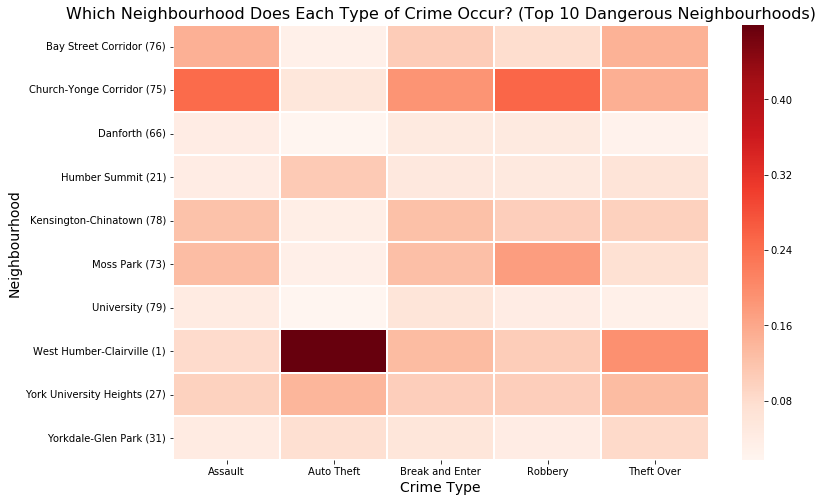

In [25]:
# set up figure size
plt.figure(figsize=(12,8))
# heatmap to see relationship between each crime type in the top 10 most dangerous neighbourhood 
sns.heatmap(dangerous_crime,cmap='Reds',linewidths=1)
# plot title
plt.title('Which Neighbourhood Does Each Type of Crime Occur? (Top 10 Dangerous Neighbourhoods)',size = 16)
# align y labels to center of each cell
plt.yticks(va="center")
# plot x label
plt.xlabel("Crime Type",size=14)
# plot y label
plt.ylabel("Neighbourhood",size=14)
# save graph to png
plt.savefig('10.png')
